In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
data = pd.read_csv("Spotify_data.csv")
data

,Unnamed: 0,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,...,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,0,Not Like Us,Kendrick Lamar,Not Like Us,5JjnoGJyOxfSZUZtk2rRwZ,6AI3ezQ4o3HUoP6Dhudph3,96,2024-05-04,274192,True,...,0.472,1,-7.001,1,0.0776,0.0107,0.000000,0.1410,0.214,101.061
1,1,Houdini,Eminem,Houdini,6Xuu2z00jxRPZei4IJ9neK,2HYFX63wP3otVIvopRS99Z,94,2024-05-31,227239,True,...,0.887,9,-2.760,0,0.0683,0.0292,0.000002,0.0582,0.889,127.003
2,2,BAND4BAND (feat. Lil Baby),"Central Cee, Lil Baby",BAND4BAND (feat. Lil Baby),4AzPr5SUpNF553eC1d3aRy,7iabz12vAuVQYyekFIWJxD,91,2024-05-23,140733,True,...,0.764,11,-5.241,1,0.2040,0.3590,0.000000,0.1190,0.886,140.113
3,3,I Don't Wanna Wait,"David Guetta, OneRepublic",I Don't Wanna Wait,0wCLHkBRKcndhMQQpeo8Ji,331l3xABO0HMr1Kkyh2LZq,90,2024-04-05,149668,False,...,0.714,1,-4.617,0,0.0309,0.0375,0.000000,0.2320,0.554,129.976
4,4,Pedro,"Jaxomy, Agatino Romero, Raffaella Carrà",Pedro,5y6RXjI5VPR0RyInghTbf1,48lxT5qJF0yYyf2z4wB4xW,89,2024-03-29,144846,False,...,0.936,9,-6.294,1,0.3010,0.0229,0.000001,0.3110,0.844,151.019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,222,Tu Chahiye,"Pritam, Atif Aslam",Bajrangi Bhaijaan,4nZOPP0atfJbBlkedLYi7t,3aaiAWCet6sbfOfLSn3g7i,66,2015-07-07,272680,False,...,0.744,7,-5.817,1,0.0446,0.4030,0.000000,0.0853,0.415,134.068
223,223,"Aabaad Barbaad (From ""Ludo"")","Pritam, Arijit Singh","Aabaad Barbaad (From ""Ludo"")",1PzsfgcbPbiW7uflc9Zi5Z,0hFUtSsV2itYEUTZGj6w5H,58,2020-10-21,309103,False,...,0.522,7,-5.857,1,0.0317,0.6860,0.000000,0.4100,0.628,118.001
224,224,Jag Ghoomeya,"Vishal-Shekhar, Rahat Fateh Ali Khan, Irshad K...",Sultan,0tAi6H8acUKefYMIEuxcMA,4KCbZcshgibfJSCAkg87Lv,62,2016-05-31,281992,False,...,0.565,11,-7.954,1,0.0347,0.4790,0.000002,0.1050,0.607,82.653
225,225,"Tumhe Kitna Pyaar Karte (From ""Bawaal"")","Mithoon, Arijit Singh, Manoj Muntashir","Tumhe Kitna Pyaar Karte (From ""Bawaal"")",20zQZcEhMLsDUn1LhPCEFY,03hJuEQpEQERrHpjcXKWzJ,65,2023-07-07,305232,False,...,0.374,10,-9.849,0,0.0328,0.9240,0.000008,0.0840,0.388,101.855


In [3]:
data.head()

,Unnamed: 0,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,...,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,0,Not Like Us,Kendrick Lamar,Not Like Us,5JjnoGJyOxfSZUZtk2rRwZ,6AI3ezQ4o3HUoP6Dhudph3,96,2024-05-04,274192,True,...,0.472,1,-7.001,1,0.0776,0.0107,0.000000,0.1410,0.214,101.061
1,1,Houdini,Eminem,Houdini,6Xuu2z00jxRPZei4IJ9neK,2HYFX63wP3otVIvopRS99Z,94,2024-05-31,227239,True,...,0.887,9,-2.760,0,0.0683,0.0292,0.000002,0.0582,0.889,127.003
2,2,BAND4BAND (feat. Lil Baby),"Central Cee, Lil Baby",BAND4BAND (feat. Lil Baby),4AzPr5SUpNF553eC1d3aRy,7iabz12vAuVQYyekFIWJxD,91,2024-05-23,140733,True,...,0.764,11,-5.241,1,0.2040,0.3590,0.000000,0.1190,0.886,140.113
3,3,I Don't Wanna Wait,"David Guetta, OneRepublic",I Don't Wanna Wait,0wCLHkBRKcndhMQQpeo8Ji,331l3xABO0HMr1Kkyh2LZq,90,2024-04-05,149668,False,...,0.714,1,-4.617,0,0.0309,0.0375,0.000000,0.2320,0.554,129.976
4,4,Pedro,"Jaxomy, Agatino Romero, Raffaella Carrà",Pedro,5y6RXjI5VPR0RyInghTbf1,48lxT5qJF0yYyf2z4wB4xW,89,2024-03-29,144846,False,...,0.936,9,-6.294,1,0.3010,0.0229,0.000001,0.3110,0.844,151.019


In [4]:
data.tail()

,Unnamed: 0,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,...,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
222,222,Tu Chahiye,"Pritam, Atif Aslam",Bajrangi Bhaijaan,4nZOPP0atfJbBlkedLYi7t,3aaiAWCet6sbfOfLSn3g7i,66,2015-07-07,272680,False,...,0.744,7,-5.817,1,0.0446,0.403,0.000000,0.0853,0.415,134.068
223,223,"Aabaad Barbaad (From ""Ludo"")","Pritam, Arijit Singh","Aabaad Barbaad (From ""Ludo"")",1PzsfgcbPbiW7uflc9Zi5Z,0hFUtSsV2itYEUTZGj6w5H,58,2020-10-21,309103,False,...,0.522,7,-5.857,1,0.0317,0.686,0.000000,0.4100,0.628,118.001
224,224,Jag Ghoomeya,"Vishal-Shekhar, Rahat Fateh Ali Khan, Irshad K...",Sultan,0tAi6H8acUKefYMIEuxcMA,4KCbZcshgibfJSCAkg87Lv,62,2016-05-31,281992,False,...,0.565,11,-7.954,1,0.0347,0.479,0.000002,0.1050,0.607,82.653
225,225,"Tumhe Kitna Pyaar Karte (From ""Bawaal"")","Mithoon, Arijit Singh, Manoj Muntashir","Tumhe Kitna Pyaar Karte (From ""Bawaal"")",20zQZcEhMLsDUn1LhPCEFY,03hJuEQpEQERrHpjcXKWzJ,65,2023-07-07,305232,False,...,0.374,10,-9.849,0,0.0328,0.924,0.000008,0.0840,0.388,101.855
226,226,Bekhayali,Sachet Tandon,Kabir Singh,3uuu6u13U0KeVQsZ3CZKK4,4yMbbysldl7E3WgiaugnwM,61,2019-06-14,371791,False,...,0.582,9,-5.180,0,0.0413,0.449,0.000000,0.3190,0.365,168.400


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        227 non-null    int64  
 1   Track Name        227 non-null    object 
 2   Artists           227 non-null    object 
 3   Album Name        227 non-null    object 
 4   Album ID          227 non-null    object 
 5   Track ID          227 non-null    object 
 6   Popularity        227 non-null    int64  
 7   Release Date      227 non-null    object 
 8   Duration (ms)     227 non-null    int64  
 9   Explicit          227 non-null    bool   
 10  External URLs     227 non-null    object 
 11  Danceability      227 non-null    float64
 12  Energy            227 non-null    float64
 13  Key               227 non-null    int64  
 14  Loudness          227 non-null    float64
 15  Mode              227 non-null    int64  
 16  Speechiness       227 non-null    float64
 1

In [6]:
data.describe()

,Unnamed: 0,Popularity,Duration (ms),Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
count,227.000000,227.00000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,113.000000,71.85022,219254.881057,0.635639,0.646665,5.458150,-6.516670,0.678414,0.079576,0.375060,0.028890,0.177797,0.472441,119.466361
std,65.673435,10.24110,60483.492317,0.155123,0.159150,3.760738,2.099543,0.468117,0.085100,0.300084,0.137225,0.121366,0.193902,26.154889
min,0.000000,13.00000,96947.000000,0.271000,0.236000,0.000000,-15.073000,0.000000,0.024600,0.000307,0.000000,0.029700,0.038500,61.311000
25%,56.500000,68.00000,170554.500000,0.552000,0.539500,2.000000,-7.830000,0.000000,0.033800,0.065000,0.000000,0.101000,0.324500,95.457500
50%,113.000000,72.00000,222462.000000,0.634000,0.655000,6.000000,-6.346000,1.000000,0.042100,0.393000,0.000002,0.127000,0.462000,122.925000
75%,169.500000,78.00000,265611.000000,0.746000,0.763500,9.000000,-5.080500,1.000000,0.081200,0.630500,0.000170,0.219000,0.595000,137.952000
max,226.000000,96.00000,383639.000000,0.948000,0.972000,11.000000,-0.424000,1.000000,0.491000,0.940000,0.901000,0.790000,0.972000,187.629000


In [7]:
data.isnull().sum()

Unnamed: 0          0
Track Name          0
Artists             0
Album Name          0
Album ID            0
Track ID            0
Popularity          0
Release Date        0
Duration (ms)       0
Explicit            0
External URLs       0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
dtype: int64

In [8]:
data.shape
del data['Unnamed: 0']

In [9]:
cols_to_drop = ['Track Name',  'Album Name', 'Album ID', 'Track ID',
                'Release Date', 'External URLs','Artists','Unnamed: 0','Duration (ms)' ]
data_cleaned = data.drop(columns=cols_to_drop)

duplicate =data [data.duplicated(subset=None,keep=False)]
duplicate

,Unnamed: 0,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,...,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo


In [13]:
data_cleaned['Explicit'] = data_cleaned['Explicit'].astype(float)
data_cleaned['Key'] = data_cleaned['Key'].astype(float)
data_cleaned['Mode'] = data_cleaned['Mode'].astype(float)
label_enc = LabelEncoder()

data_cleaned.to_csv('Data_Cleaned.csv')

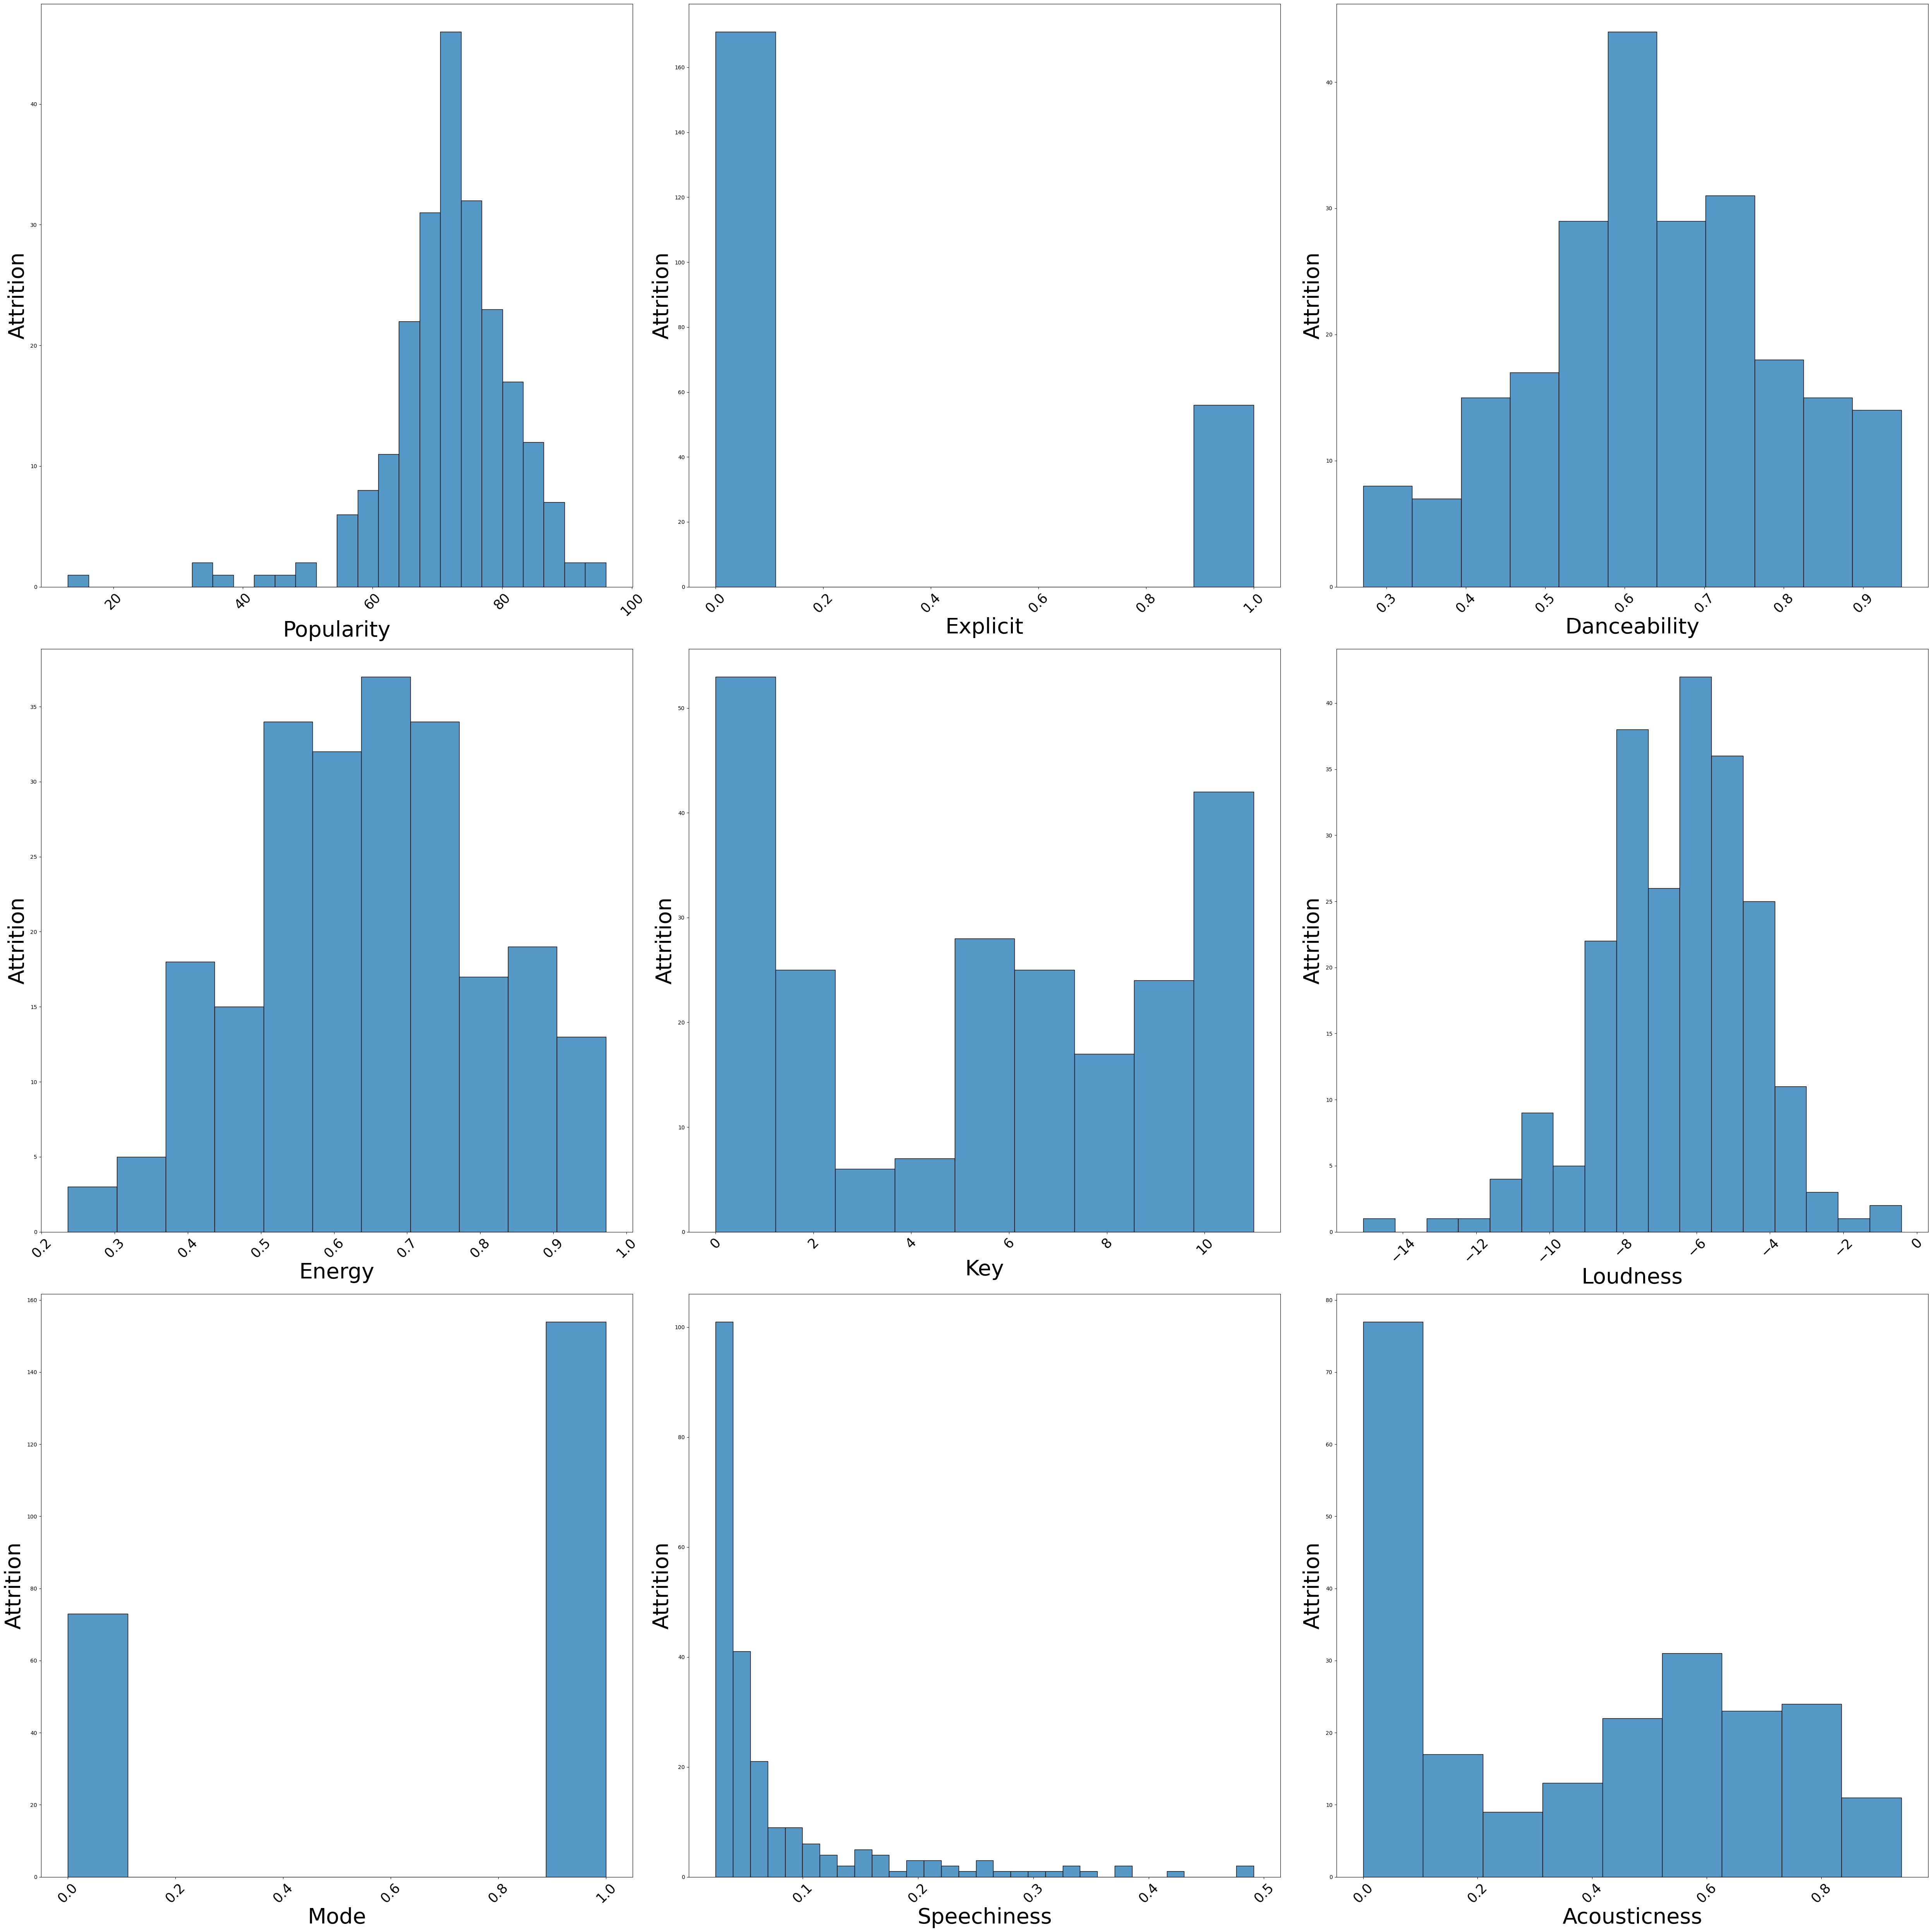

In [14]:
import warnings
warnings.filterwarnings('ignore')
# Plotting how every  categorical feature correlate with the "target"
plt.figure(figsize=(50, 50), facecolor='white')#canvas size
plotnumber = 1#count variable

for column in data_cleaned:#for loop to acess columns form data1
    if plotnumber<=9 :#checking whether count variable is less than 16 or not
        ax = plt.subplot(3, 3,plotnumber)#plotting 8 graphs in canvas(4 rows and 4 columns)
        sns.histplot(data_cleaned[column])
        plt.xlabel(column,fontsize=40)#assigning name to x-axis and increasing it's font 
        plt.ylabel('Attrition',fontsize=40)#assigning name to y-axis and increasing it's font 
        plt.xticks(fontsize=25, rotation=45)
    plotnumber+=1#increasing counter
plt.tight_layout()
plt.show()

In [15]:
X = data_cleaned.drop(columns=['Popularity'])
y = data_cleaned['Popularity']
X,y.shape

(     Explicit  Danceability  Energy   Key  Loudness  Mode  Speechiness  \
 0         1.0         0.898   0.472   1.0    -7.001   1.0       0.0776   
 1         1.0         0.936   0.887   9.0    -2.760   0.0       0.0683   
 2         1.0         0.882   0.764  11.0    -5.241   1.0       0.2040   
 3         0.0         0.681   0.714   1.0    -4.617   0.0       0.0309   
 4         0.0         0.788   0.936   9.0    -6.294   1.0       0.3010   
 ..        ...           ...     ...   ...       ...   ...          ...   
 222       0.0         0.565   0.744   7.0    -5.817   1.0       0.0446   
 223       0.0         0.626   0.522   7.0    -5.857   1.0       0.0317   
 224       0.0         0.484   0.565  11.0    -7.954   1.0       0.0347   
 225       0.0         0.602   0.374  10.0    -9.849   0.0       0.0328   
 226       0.0         0.296   0.582   9.0    -5.180   0.0       0.0413   
 
      Acousticness  Instrumentalness  Liveness  Valence    Tempo  
 0          0.0107          0.0

In [16]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

X_res,y_res.shape

(     Explicit  Danceability  Energy   Key  Loudness  Mode  Speechiness  \
 0         1.0         0.898   0.472   1.0    -7.001   1.0       0.0776   
 1         1.0         0.936   0.887   9.0    -2.760   0.0       0.0683   
 2         1.0         0.882   0.764  11.0    -5.241   1.0       0.2040   
 3         0.0         0.681   0.714   1.0    -4.617   0.0       0.0309   
 4         0.0         0.788   0.936   9.0    -6.294   1.0       0.3010   
 ..        ...           ...     ...   ...       ...   ...          ...   
 850       1.0         0.898   0.472   1.0    -7.001   1.0       0.0776   
 851       1.0         0.898   0.472   1.0    -7.001   1.0       0.0776   
 852       1.0         0.898   0.472   1.0    -7.001   1.0       0.0776   
 853       1.0         0.898   0.472   1.0    -7.001   1.0       0.0776   
 854       1.0         0.898   0.472   1.0    -7.001   1.0       0.0776   
 
      Acousticness  Instrumentalness  Liveness  Valence    Tempo  
 0          0.0107          0.0

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
clf = RandomForestRegressor(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [ ]:

from sklearn.metrics import mean_squared_error
y_pred = clf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)



Mean Squared Error: 214.7625894736842


In [33]:
y_test = pd.Categorical(y_test)
y_pred = pd.Categorical(y_pred)
y_test.astype(float)

array([63., 87., 94., 79., 43., 60., 55., 57., 81., 34., 85., 88., 91.,
       49., 90., 66., 71., 62., 67., 65., 60., 82., 83., 87., 69., 96.,
       82., 64., 77., 82., 61., 70., 62., 73., 79., 68., 43., 80., 80.,
       89., 78., 74., 70., 91., 86., 73., 88., 61., 43., 45., 55., 63.,
       13., 63., 79., 78., 79., 71., 88., 70., 13., 62., 58., 91., 49.,
       49., 85., 68., 84., 75., 89., 67., 58., 65., 76., 45., 75., 60.,
       77., 66., 94., 38., 96., 69., 13., 96., 73., 59., 56., 76., 57.,
       38., 89., 49., 56., 64., 77., 87., 34., 86., 86., 55., 65., 74.,
       59., 62., 91., 83., 76., 94., 59., 61., 84., 64., 73., 72., 81.,
       69., 45., 71., 34., 57., 77., 68., 72., 82., 90., 83., 63., 89.,
       78., 72., 96., 60., 87., 78., 69., 56., 64., 58., 72., 83., 67.,
       58., 81., 85., 34., 55., 59., 38., 68., 84., 56., 80., 66., 76.,
       38., 74., 75., 85., 66., 67., 71., 81., 80., 43., 90., 13., 86.,
       65., 70.])

In [34]:

print("ACCURACY SCORE",accuracy_score(y_test,y_pred))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

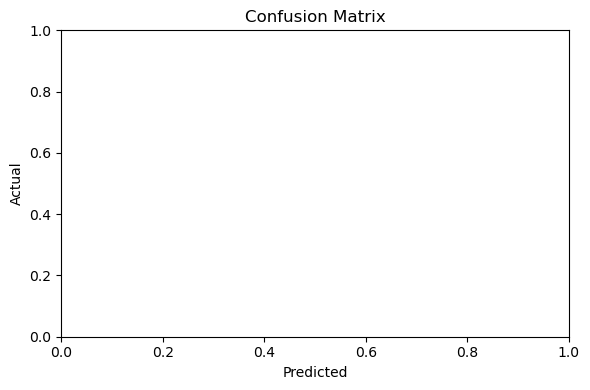

In [35]:
# 11. Confusion matrix
plt.figure(figsize=(6, 4))

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


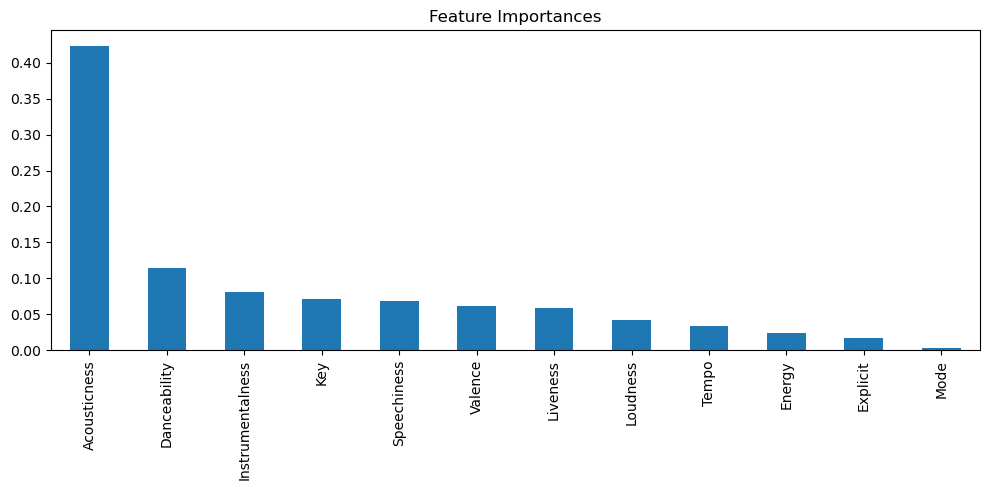

In [36]:
importances = clf.feature_importances_
features = X.columns
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
feat_imp.plot(kind='bar')
plt.title("Feature Importances")
plt.tight_layout()
plt.show()


In [39]:
import pickle
with open("rf_model.pkl", "wb") as f:
    pickle.dump(clf, f)


In [40]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [ ]:
with open("rf_model.pkl", "rb") as f:
    model = pickle.load(f)

In [67]:
import sweetviz as sv #importing sweetviz library 
my_report = sv.analyze(data)#syntax to use sweetviz
my_report.show_html() #Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,External URLs,...,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
100,"Phir Aur Kya Chahiye (From ""Zara Hatke Zara Ba...","Sachin-Jigar, Arijit Singh, Amitabh Bhattacharya","Phir Aur Kya Chahiye (From ""Zara Hatke Zara Ba...",6j4QpObdnZpxNU52o2egBZ,5QW9K4A1gMnIi94YUxtsfM,70,2023-05-16,266075,False,https://open.spotify.com/track/5QW9K4A1gMnIi94...,...,0.552,4,-5.875,1,0.0373,0.531,0.000000,0.121,0.531,100.051
101,"Dekhha Tenu (From ""Mr. And Mrs. Mahi"")","Mohammad Faiz, Jaani","Dekhha Tenu (From ""Mr. And Mrs. Mahi"")",1C3FmwSQAbjnZR6GRgnWQc,34Fh4HXZmnuBdtgejWUZg2,81,2024-05-14,281512,False,https://open.spotify.com/track/34Fh4HXZmnuBdtg...,...,0.439,10,-6.901,1,0.0368,0.711,0.000000,0.193,0.506,83.982
104,"Sajni (From ""Laapataa Ladies"")","Ram Sampath, Arijit Singh, Prashant Pandey","Sajni (From ""Laapataa Ladies"")",3I3kZyHUtEA9Y59rJkxtk6,5zCnGtCl5Ac5zlFHXaZmhy,83,2024-02-12,170045,False,https://open.spotify.com/track/5zCnGtCl5Ac5zlF...,...,0.413,0,-7.783,1,0.0281,0.827,0.000009,0.108,0.355,79.646
109,"Soni Soni (From ""Ishq Vishk Rebound"")","Darshan Raval, Jonita Gandhi, Rochak Kohli, Gu...","Soni Soni (From ""Ishq Vishk Rebound"")",3vBso6gFPmEwstdMXn3Ahi,36N5awamOX6XX5pQn3aFXZ,77,2024-05-24,176875,False,https://open.spotify.com/track/36N5awamOX6XX5p...,...,0.694,8,-7.830,0,0.0527,0.551,0.000626,0.128,0.484,108.035
113,Pehle Bhi Main,"Vishal Mishra, Raj Shekhar",ANIMAL,0a183xiCHiC1GQd8ou7WXO,7yDHHVKLbvDmVw1XXhDDIO,80,2023-11-24,250158,False,https://open.spotify.com/track/7yDHHVKLbvDmVw1...,...,0.406,10,-10.230,0,0.0353,0.768,0.000002,0.107,0.281,76.944
116,"Tum Kya Mile (From ""Rocky Aur Rani Kii Prem Ka...","Pritam, Arijit Singh, Shreya Ghoshal, Amitabh ...","Tum Kya Mile (From ""Rocky Aur Rani Kii Prem Ka...",5FtQVEQsWzRcpqh820ZoII,06LCamFUOtImIKi9mFRKiD,73,2023-06-28,277500,False,https://open.spotify.com/track/06LCamFUOtImIKi...,...,0.726,7,-6.504,1,0.0527,0.586,0.000000,0.353,0.532,87.425
117,Apna Bana Le,"Sachin-Jigar, Arijit Singh, Amitabh Bhattacharya",Bhediya (Original Motion Picture Soundtrack),12sC6UjMWz6EaxnzyfCNMe,5bQ6oDLqvw8tywmnSmwEyL,74,2022-11-22,261702,False,https://open.spotify.com/track/5bQ6oDLqvw8tywm...,...,0.562,9,-7.399,1,0.0267,0.803,0.000006,0.063,0.436,93.982
125,"Satranga (From ""ANIMAL"")","Arijit Singh, Shreyas Puranik, Siddharth - Garima","Satranga (From ""ANIMAL"")",5mZX4EMwEyohNmVfLTDtXn,3yHyiUDJdz02FZ6jfUbsmY,80,2023-10-27,271169,False,https://open.spotify.com/track/3yHyiUDJdz02FZ6...,...,0.405,0,-5.810,1,0.0298,0.735,0.000000,0.189,0.534,89.480
127,"Tum Se (From ""Teri Baaton Mein Aisa Uljha Jiya"")","Sachin-Jigar, Raghav Chaitanya, Varun Jain, In...","Tum Se (From ""Teri Baaton Mein Aisa Uljha Jiya"")",3vVIhgkDoC0vRBba5drHPe,2ceeTJAzKy295Fm0VsaXtE,78,2024-02-02,264090,False,https://open.spotify.com/track/2ceeTJAzKy295Fm...,...,0.595,10,-6.356,1,0.0331,0.680,0.000001,0.104,0.435,99.991
130,"Agar Ho Tum (From ""Mr. And Mrs. Mahi"")","Tanishk Bagchi, Kausar Munir","Agar Ho Tum (From ""Mr. And Mrs. Mahi"")",08PRzEfce7mwprUTvMmfh2,0a17mIL7XTvYqe9mxuPd3y,71,2024-05-20,253224,False,https://open.spotify.com/track/0a17mIL7XTvYqe9...,...,0.499,2,-10.061,1,0.0415,0.582,0.000000,0.101,0.591,151.848
